In [1]:
import pandas as pd
from datetime import timedelta
df = pd.read_parquet("./progress.parquet")
df["duration"]

0     0 days 00:00:00
1     0 days 00:04:00
2     0 days 00:06:00
3     0 days 00:04:00
4     0 days 00:02:00
            ...      
367   0 days 00:00:00
368   0 days 00:01:00
369   0 days 00:01:00
370   0 days 00:01:00
371   0 days 00:01:00
Name: duration, Length: 372, dtype: timedelta64[ns]

In [2]:
ti = df.loc[(df["section_num"]==6) & (df["done"] == False), "duration"].sum()

In [33]:
df

,section_num,Vid idx,title,duration,done
0,1,-1,Section 1: Introduction,0 days 00:00:00,True
1,1,1,PyTorch for Deep Learning,0 days 00:04:00,True
2,1,2,Course Welcome and What Is Deep Learning,0 days 00:06:00,True
3,1,3,Join Our Online Classroom!,0 days 00:04:00,True
4,1,4,Exercise: Meet Your Classmates + Instructor,0 days 00:02:00,True
...,...,...,...,...,...
367,14,-1,Section 14: Where To Go From Here?,0 days 00:00:00,True
368,14,355,Thank You!,0 days 00:01:00,False
369,14,356,Become An Alumni,0 days 00:01:00,False
370,14,357,Endorsements on LinkedIn,0 days 00:01:00,False


In [3]:
ti

Timedelta('0 days 01:22:00')

In [4]:
from datetime import timedelta


def format_duration(td: timedelta):
    days = td.days
    hours, remainder = divmod(td.seconds, 3600)
    minutes, _ = divmod(remainder, 60)
    return f"{f"{days}d " if days!=0 else""}{f"{hours}h " if hours!=0 else""}{f"{minutes}m" if minutes!=0 else""}"

print("Total:", format_duration(ti))

Total: 1h 22m


In [27]:
report = []

for section in range(1, 15):
    mask = (df["section_num"] == section) & (df["done"] == False)
    # print(df.loc[mask])
    total_duration = df.loc[mask, "duration"].sum()
    amount_of_vids = mask.sum()
    formatted = format_duration(total_duration)
    if total_duration > timedelta():
        report.append(f"Section {section}: {formatted}")
    else:
        report.append(f"Section {section}: Done")
    if amount_of_vids > 0:
        report[-1] += f", {amount_of_vids} videos remaining"

# join with newlines
report_text = "\n".join(report)

print(report_text)

Section 1: Done
Section 2: Done
Section 3: Done
Section 4: Done
Section 5: Done
Section 6: 1h 22m, 10 videos remaining
Section 7: 1h 33m, 10 videos remaining
Section 8: 2h 44m, 19 videos remaining
Section 9: 3h 11m, 22 videos remaining
Section 10: 8h 7m, 50 videos remaining
Section 11: 7h 45m, 57 videos remaining
Section 12: 3h 3m, 25 videos remaining
Section 13: 1m, 1 videos remaining
Section 14: 4m, 4 videos remaining


In [12]:

print(f"""
Remaining time to finish sections:
{report_text}
""")


Remaining time to finish sections
Section 1:  
Section 2:  
Section 3:  
Section 4:  
Section 5:  
Section 6: 1h 22m 
Section 7: 1h 33m 
Section 8: 2h 44m 
Section 9: 3h 11m 
Section 10: 8h 7m 
Section 11: 7h 45m 
Section 12: 3h 3m 
Section 13: 1m 




In [76]:
import pandas as pd
def update_progess(video_index:int, done:bool):
    df = pd.read_parquet("./progress.parquet")
    mask = (df["Vid idx"] == video_index)
    df.loc[mask, "done"] = done
    df.to_parquet("./progress.parquet")
    status = "done" if df.loc[mask, "done"].values[0] else "tasked"
    df.to_parquet("./progress.parquet")
    # df.loc[mask, "finished_date"] = pd.Timestamp.now()
    print(f"Updated progress report. \n"
          f"Section: {df.loc[mask].values[0][0]} \n"
          f"Video: {df.loc[mask].values[0][1]}. {df.loc[mask].values[0][2]} \n"
          f"Status: {status}")

In [79]:
df = pd.read_parquet("./progress.parquet")
mask = (df["Vid idx"] == 159)
df.loc[mask].values[0]

array([6, 159, 'Plotting the Loss Curves of Model 0',
       Timedelta('0 days 00:09:00'), True], dtype=object)

In [78]:
update_progess(160, False)

Updated progress report. 
Section: 6 
Video: 160. The Balance Between Overfitting and Underfitting and How to Deal With Each 
Status: tasked


In [80]:
df["finished_date"] = pd.Timestamp.now()

In [116]:
df["finished_date"] = pd.NaT
df

,section_num,Vid idx,title,duration,done,finished_date
0,1,-1,Section 1: Introduction,0 days 00:00:00,True,NaT
1,1,1,PyTorch for Deep Learning,0 days 00:04:00,True,NaT
2,1,2,Course Welcome and What Is Deep Learning,0 days 00:06:00,True,NaT
3,1,3,Join Our Online Classroom!,0 days 00:04:00,True,NaT
4,1,4,Exercise: Meet Your Classmates + Instructor,0 days 00:02:00,True,NaT
...,...,...,...,...,...,...
368,14,355,Thank You!,0 days 00:01:00,False,NaT
369,14,356,Become An Alumni,0 days 00:01:00,False,NaT
370,14,357,Endorsements on LinkedIn,0 days 00:01:00,False,NaT
371,14,358,Learning Guideline,0 days 00:01:00,False,NaT


In [117]:
df.loc[df["section_num"] <=2, "finished_date"] = pd.Timestamp(day=6, month=7, year=2025)

In [118]:
df.loc[(df["Vid idx"] <= 47) & (df["Vid idx"] >= 40), "finished_date"] = pd.Timestamp(day=6, month=7, year=2025)

In [119]:
df.loc[(df["Vid idx"] <= 49) & (df["Vid idx"] >= 48), "finished_date"] = pd.Timestamp(day=7, month=7, year=2025)

In [120]:
df.loc[(df["Vid idx"] <= 55) & (df["Vid idx"] >= 50), "finished_date"] = pd.Timestamp(day=15, month=7, year=2025)

In [121]:
df.loc[(df["Vid idx"] <= 67) & (df["Vid idx"] >= 56), "finished_date"] = pd.Timestamp(day=16, month=7, year=2025)

In [122]:
df.loc[(df["section_num"]==3) & (df["Vid idx"] ==-1), "finished_date"] = pd.Timestamp(day=16, month=7, year=2025)

In [124]:
df.loc[(df["Vid idx"] <= 74) & (df["Vid idx"] >= 68), "finished_date"] = pd.Timestamp(day=19, month=7, year=2025)

In [125]:
df.loc[(df["Vid idx"] <= 79) & (df["Vid idx"] >= 75), "finished_date"] = pd.Timestamp(day=27, month=7, year=2025)

In [126]:
df.loc[(df["Vid idx"] <= 83) & (df["Vid idx"] >= 80), "finished_date"] = pd.Timestamp(day=28, month=7, year=2025)

In [127]:
df.loc[(df["Vid idx"] <= 99) & (df["Vid idx"] >= 84), "finished_date"] = pd.Timestamp(day=13, month=9, year=2025)

In [169]:
df.loc[(df["section_num"]==4) & (df["Vid idx"] ==-1), "finished_date"] = pd.Timestamp(day=13, month=9, year=2025)

In [128]:
df.loc[(df["Vid idx"] <= 103) & (df["Vid idx"] >= 100), "finished_date"] = pd.Timestamp(day=15, month=9, year=2025)

In [129]:
df.loc[(df["Vid idx"] <= 108) & (df["Vid idx"] >= 104), "finished_date"] = pd.Timestamp(day=16, month=9, year=2025)

In [130]:
df.loc[(df["Vid idx"] <= 111) & (df["Vid idx"] >= 109), "finished_date"] = pd.Timestamp(day=17, month=9, year=2025)

In [131]:
df.loc[(df["Vid idx"] <= 112) & (df["Vid idx"] >= 112), "finished_date"] = pd.Timestamp(day=20, month=9, year=2025)

In [132]:
df.loc[(df["Vid idx"] <= 114) & (df["Vid idx"] >= 113), "finished_date"] = pd.Timestamp(day=21, month=9, year=2025)

In [133]:
df.loc[(df["Vid idx"] <= 133) & (df["Vid idx"] >= 115), "finished_date"] = pd.Timestamp(day=23, month=9, year=2025)

In [134]:
df.loc[(df["section_num"]==5) & (df["Vid idx"] ==-1), "finished_date"] = pd.Timestamp(day=23, month=9, year=2025)

In [135]:
df.loc[(df["Vid idx"] <= 139) & (df["Vid idx"] >= 134), "finished_date"] = pd.Timestamp(day=26, month=9, year=2025)

In [136]:
df.loc[(df["Vid idx"] <= 146) & (df["Vid idx"] >= 140), "finished_date"] = pd.Timestamp(day=27, month=9, year=2025)

In [137]:
df.loc[(df["Vid idx"] <= 149) & (df["Vid idx"] >= 147), "finished_date"] = pd.Timestamp(day=29, month=9, year=2025)

In [138]:
df.loc[(df["Vid idx"] <= 156) & (df["Vid idx"] >= 150), "finished_date"] = pd.Timestamp(day=30, month=9, year=2025)

In [139]:
df.loc[(df["Vid idx"] <= 159) & (df["Vid idx"] >= 157), "finished_date"] = pd.Timestamp(day=1, month=10, year=2025)

In [140]:
df

,section_num,Vid idx,title,duration,done,finished_date
0,1,-1,Section 1: Introduction,0 days 00:00:00,True,2025-07-06
1,1,1,PyTorch for Deep Learning,0 days 00:04:00,True,2025-07-06
2,1,2,Course Welcome and What Is Deep Learning,0 days 00:06:00,True,2025-07-06
3,1,3,Join Our Online Classroom!,0 days 00:04:00,True,2025-07-06
4,1,4,Exercise: Meet Your Classmates + Instructor,0 days 00:02:00,True,2025-07-06
...,...,...,...,...,...,...
368,14,355,Thank You!,0 days 00:01:00,False,NaT
369,14,356,Become An Alumni,0 days 00:01:00,False,NaT
370,14,357,Endorsements on LinkedIn,0 days 00:01:00,False,NaT
371,14,358,Learning Guideline,0 days 00:01:00,False,NaT


In [148]:
df['duration'] = df['duration'].apply(pd.Timedelta)

In [147]:
df.loc[(df["done"]==True) & (df["finished_date"] == pd.NaT)] # Nice

,section_num,Vid idx,title,duration,done,finished_date


In [164]:
df = df.copy()

df["section_num"] = df["section_num"].astype("Int64")
df["Vid idx"] = df["Vid idx"].astype("Int64")
df["title"] = df["title"].astype("string")
df["duration"] = pd.to_timedelta(df["duration"])
df["done"] = df["done"].astype("boolean")
df["finished_date"] = pd.to_datetime(df["finished_date"])
df

,section_num,Vid idx,title,duration,done,finished_date
0,1,-1,Section 1: Introduction,0 days 00:00:00,True,2025-07-06
1,1,1,PyTorch for Deep Learning,0 days 00:04:00,True,2025-07-06
2,1,2,Course Welcome and What Is Deep Learning,0 days 00:06:00,True,2025-07-06
3,1,3,Join Our Online Classroom!,0 days 00:04:00,True,2025-07-06
4,1,4,Exercise: Meet Your Classmates + Instructor,0 days 00:02:00,True,2025-07-06
...,...,...,...,...,...,...
367,14,-1,Section 14: Where To Go From Here?,0 days 00:00:00,True,NaT
368,14,355,Thank You!,0 days 00:01:00,False,NaT
369,14,356,Become An Alumni,0 days 00:01:00,False,NaT
370,14,357,Endorsements on LinkedIn,0 days 00:01:00,False,NaT


In [161]:
df = df.dropna(subset="title")

In [170]:
df.loc[(df["done"]==True) & (df["finished_date"].isna())]

,section_num,Vid idx,title,duration,done,finished_date
138,6,-1,Section 6: PyTorch Custom Datasets,0 days,True,NaT
176,7,-1,Section 7: PyTorch Going Modular,0 days,True,NaT
187,8,-1,Section 8: PyTorch Transfer Learning,0 days,True,NaT
207,9,-1,Section 9: PyTorch Experiment Tracking,0 days,True,NaT
230,10,-1,Section 10: PyTorch Paper Replicating,0 days,True,NaT
281,11,-1,Section 11: PyTorch Model Deployment,0 days,True,NaT
339,12,-1,Section 12: Introduction to PyTorch 2.0 and to...,0 days,True,NaT
365,13,-1,Section 13: Bonus Section,0 days,True,NaT
367,14,-1,Section 14: Where To Go From Here?,0 days,True,NaT


In [171]:
df.loc[(df["done"]==True) & (df["finished_date"].isna()), "done"] = False

In [172]:
df

,section_num,Vid idx,title,duration,done,finished_date
0,1,-1,Section 1: Introduction,0 days 00:00:00,True,2025-07-06
1,1,1,PyTorch for Deep Learning,0 days 00:04:00,True,2025-07-06
2,1,2,Course Welcome and What Is Deep Learning,0 days 00:06:00,True,2025-07-06
3,1,3,Join Our Online Classroom!,0 days 00:04:00,True,2025-07-06
4,1,4,Exercise: Meet Your Classmates + Instructor,0 days 00:02:00,True,2025-07-06
...,...,...,...,...,...,...
367,14,-1,Section 14: Where To Go From Here?,0 days 00:00:00,False,NaT
368,14,355,Thank You!,0 days 00:01:00,False,NaT
369,14,356,Become An Alumni,0 days 00:01:00,False,NaT
370,14,357,Endorsements on LinkedIn,0 days 00:01:00,False,NaT


In [173]:
df.to_parquet("./progress.parquet")

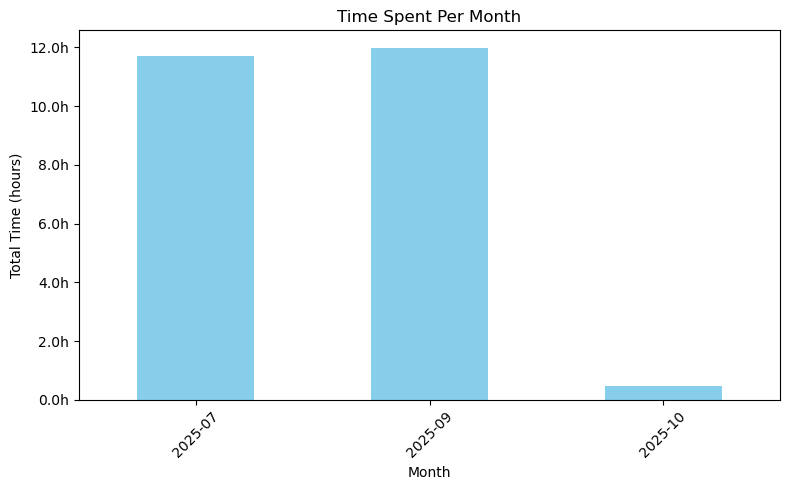

In [193]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

# Create month column
df["month"] = df["finished_date"].dt.to_period("M")

# Group by month and sum durations
monthly_time = df.groupby("month")["duration"].sum()

# Convert timedelta to hours
monthly_time_hours = monthly_time.dt.total_seconds() / 3600

# Plot
plt.figure(figsize=(8,5))
monthly_time_hours.plot(kind="bar", color="skyblue")
plt.ylabel("Total Time (hours)")
plt.xlabel("Month")
plt.title("Time Spent Per Month")
plt.xticks(rotation=45)

# Format y-axis labels nicely
formatter = FuncFormatter(lambda x, pos: f"{x:.1f}h")
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()

plt.show()


In [178]:
done_sum = df.loc[df["done"] == True, "duration"].sum()
not_done_sum = df.loc[df["done"] == False, "duration"].sum()

print("Total done time:", done_sum)
print("Total not done time:", not_done_sum)


Total done time: 1 days 00:11:00
Total not done time: 1 days 04:04:00


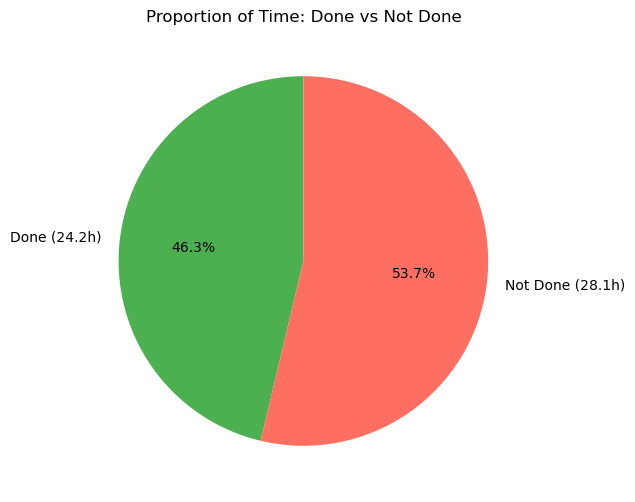

In [194]:
import matplotlib.pyplot as plt

done_sum: pd.Timedelta = df.loc[df["done"] == True, "duration"].sum()
not_done_sum: pd.Timedelta = df.loc[df["done"] == False, "duration"].sum()

times = [done_sum.total_seconds() / 3600, not_done_sum.total_seconds() / 3600]
labels = [
    f"Done ({times[0]:.1f}h)",
    f"Not Done ({times[1]:.1f}h)"
]

plt.figure(figsize=(6,6))
plt.pie(
    times,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90,
    colors=["#4CAF50", "#FF6F61"]
)
plt.title("Proportion of Time: Done vs Not Done")
plt.show()

